In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
# importing train dataaset
Train=pd.read_csv("SalaryData_Train.csv.crdownload")
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
Train.shape

(24733, 14)

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24733 entries, 0 to 24732
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            24733 non-null  int64  
 1   workclass      24733 non-null  object 
 2   education      24733 non-null  object 
 3   educationno    24732 non-null  float64
 4   maritalstatus  24732 non-null  object 
 5   occupation     24732 non-null  object 
 6   relationship   24732 non-null  object 
 7   race           24732 non-null  object 
 8   sex            24732 non-null  object 
 9   capitalgain    24732 non-null  float64
 10  capitalloss    24732 non-null  float64
 11  hoursperweek   24732 non-null  float64
 12  native         24732 non-null  object 
 13  Salary         24732 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.6+ MB


In [7]:
Train.isnull().any()

age              False
workclass        False
education        False
educationno       True
maritalstatus     True
occupation        True
relationship      True
race              True
sex               True
capitalgain       True
capitalloss       True
hoursperweek      True
native            True
Salary            True
dtype: bool

In [8]:
# Checking descriptive statistics of dataset
Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,24733.000000,24732.000000,24732.000000,24732.000000,24732.000000
mean,38.481381,10.124090,1099.770055,87.369966,40.901666
std,13.174264,2.540029,7498.890008,402.142043,11.942672
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# checking Duplicate raws
Train[Train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24714,30,Private,11th,7.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
24715,59,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
24716,42,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
24723,20,Private,HS-grad,9.0,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,30.0,United-States,<=50K


In [10]:
df1=Train.drop_duplicates()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24727,25,Private,Some-college,10.0,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,0.0,0.0,34.0,United-States,<=50K
24728,40,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
24730,51,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
24731,22,Private,Assoc-acdm,12.0,Never-married,Handlers-cleaners,Own-child,Black,Male,0.0,0.0,20.0,Jamaica,<=50K


In [11]:
# Checking Correlation between numerical function
correlation = df1.corr()
correlation

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.040718,0.076017,0.051321,0.078469
educationno,0.040718,1.000000,0.126355,0.081001,0.147489
capitalgain,0.076017,0.126355,1.000000,-0.035211,0.076918
capitalloss,0.051321,0.081001,-0.035211,1.000000,0.051923
hoursperweek,0.078469,0.147489,0.076918,0.051923,1.000000


In [12]:
# Checking Correlation between numerical function
correlationX = Train.corr() # correlation withour droping duplicated raws
correlationX

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043305,0.078847,0.058150,0.102826
educationno,0.043305,1.000000,0.124879,0.080538,0.152777
capitalgain,0.078847,0.124879,1.000000,-0.031864,0.077879
capitalloss,0.058150,0.080538,-0.031864,1.000000,0.054906
hoursperweek,0.102826,0.152777,0.077879,0.054906,1.000000


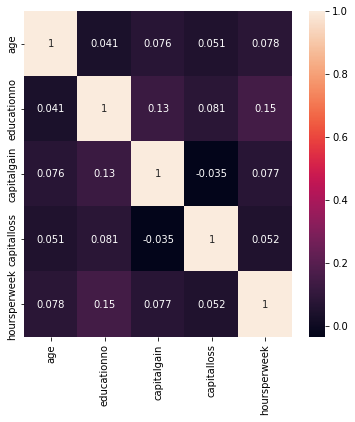

In [13]:
# creating heatmap by use of correlation
plt.figure(figsize=(6,6))
sns.heatmap(correlation,annot=True)

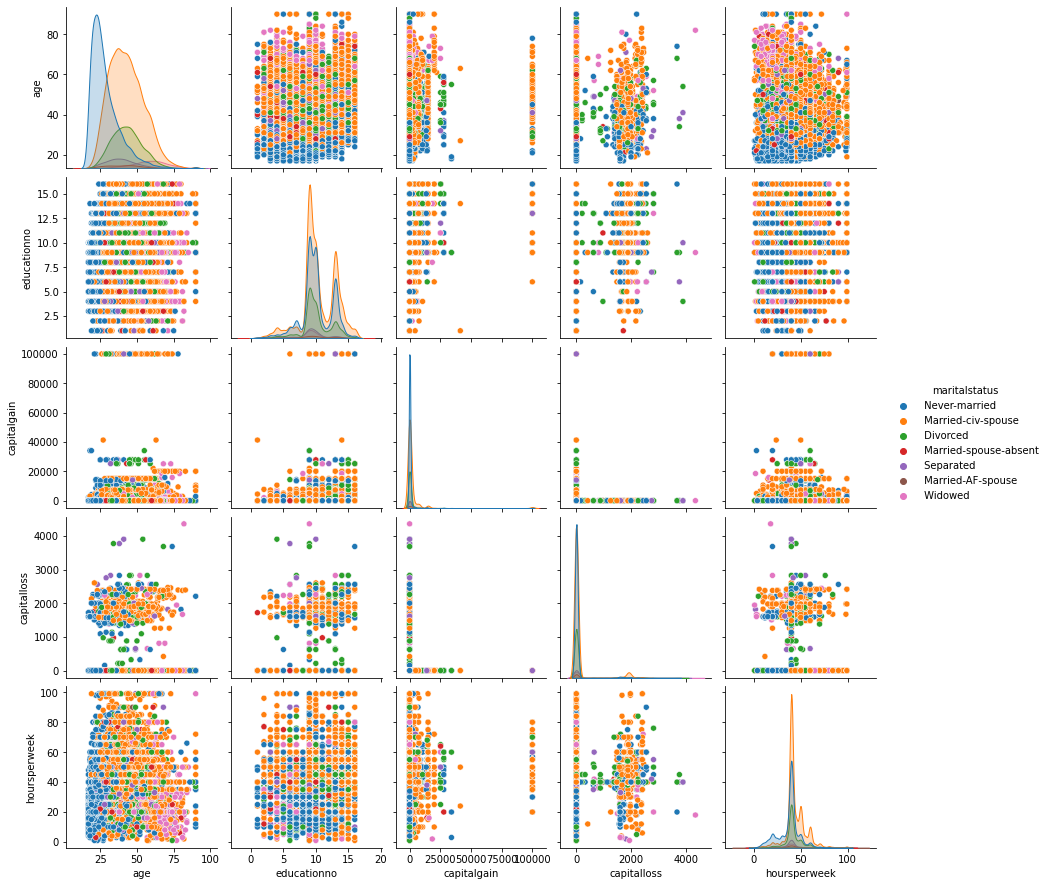

In [14]:
# ploting pair plot to visualise the attributes all at once
sns.pairplot(data=Train, hue = 'maritalstatus')

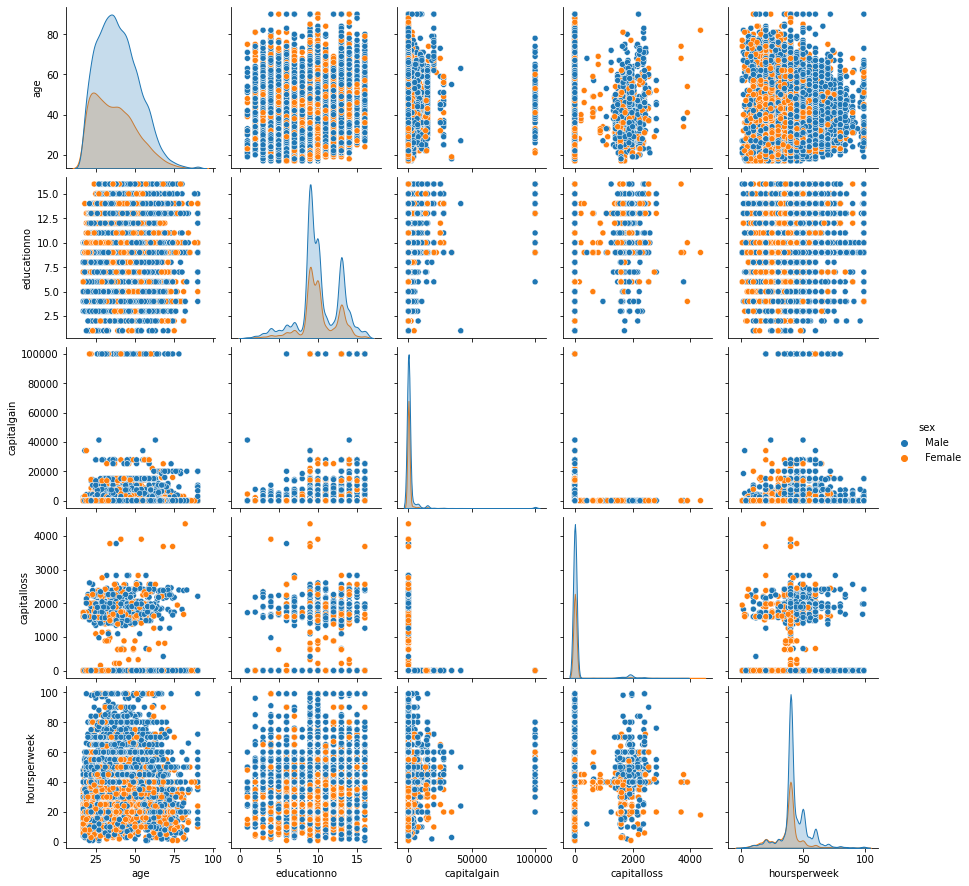

In [15]:
sns.pairplot(data=Train, hue = 'sex')

In [16]:
Train['workclass'].unique(), Train['workclass'].value_counts()

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             18226
  Self-emp-not-inc     2067
  Local-gov            1721
  State-gov            1047
  Self-emp-inc          887
  Federal-gov           775
  Without-pay            10
 Name: workclass, dtype: int64)

In [17]:
Train['education'].unique(), Train['education'].value_counts()

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
        ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
        ' 12th', ' 1st-4th', ' Some-'], dtype=object),  HS-grad         8106
  Some-college    5476
  Bachelors       4153
  Masters         1314
  Assoc-voc       1062
  11th             859
  Assoc-acdm       815
  10th             676
  7th-8th          460
  Prof-school      439
  9th              379
  Doctorate        316
  12th             307
  5th-6th          224
  1st-4th          109
  Preschool         37
  Some-              1
 Name: education, dtype: int64)

In [18]:
Train['maritalstatus'].unique(), Train['maritalstatus'].value_counts()

(array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed', nan], dtype=object),  Married-civ-spouse       11484
  Never-married             7963
  Divorced                  3483
  Separated                  783
  Widowed                    688
  Married-spouse-absent      315
  Married-AF-spouse           16
 Name: maritalstatus, dtype: int64)

In [19]:
Train['occupation'].unique(), Train['occupation'].value_counts()

(array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv', nan], dtype=object),  Prof-specialty       3327
  Craft-repair         3272
  Exec-managerial      3232
  Adm-clerical         3123
  Sales                2945
  Other-service        2660
  Machine-op-inspct    1596
  Transport-moving     1292
  Handlers-cleaners    1072
  Farming-fishing       814
  Tech-support          740
  Protective-serv       529
  Priv-house-serv       122
  Armed-Forces            8
 Name: occupation, dtype: int64)

In [20]:
Train['race'].unique(), Train['race'].value_counts()

(array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
        ' Other', nan], dtype=object),  White                 21278
  Black                  2305
  Asian-Pac-Islander      718
  Amer-Indian-Eskimo      239
  Other                   192
 Name: race, dtype: int64)

In [21]:
Train['sex'].unique(), Train['sex'].value_counts()

(array([' Male', ' Female', nan], dtype=object),  Male      16701
  Female     8031
 Name: sex, dtype: int64)

In [22]:
Train['native'].unique(), Train['native'].value_counts()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary', nan], dtype=object),  United-States                 22571
  Mexico                          493
  Philippines                     152
  Germany                         101
  Puerto-Rico                      98
  Canada                           95
  England                          76
  El-Salvador                      75
  Cuba                             75
  India                            74
  Jamaica   

In [23]:
Train['native'].unique(), Train['native'].value_counts()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary', nan], dtype=object),  United-States                 22571
  Mexico                          493
  Philippines                     152
  Germany                         101
  Puerto-Rico                      98
  Canada                           95
  England                          76
  El-Salvador                      75
  Cuba                             75
  India                            74
  Jamaica   

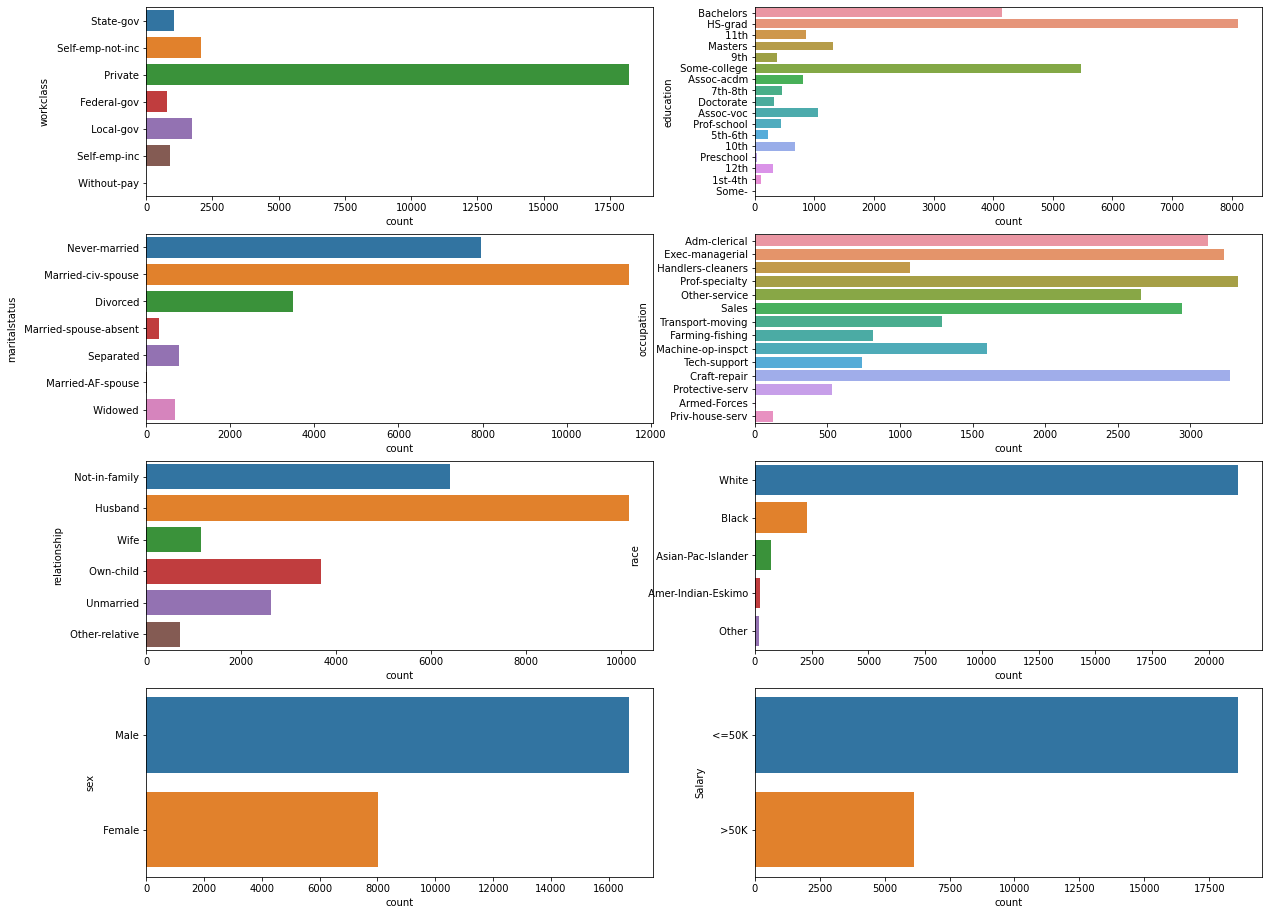

In [24]:
# Ploting Countolot for Categorical data

plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=Train, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=Train, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=Train, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=Train, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=Train, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=Train, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=Train, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=Train, y='Salary')];

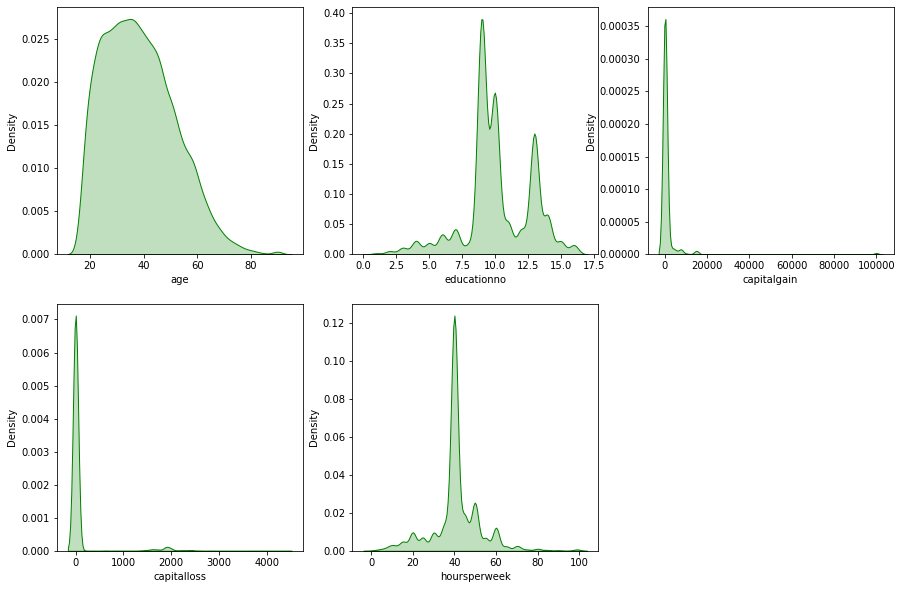

In [25]:
no_columns = Train.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(15,10))
for i,column in enumerate(no_columns,1):
    plt.subplot(2,3,i)
    sns.kdeplot(Train[column],color='g',shade=True)

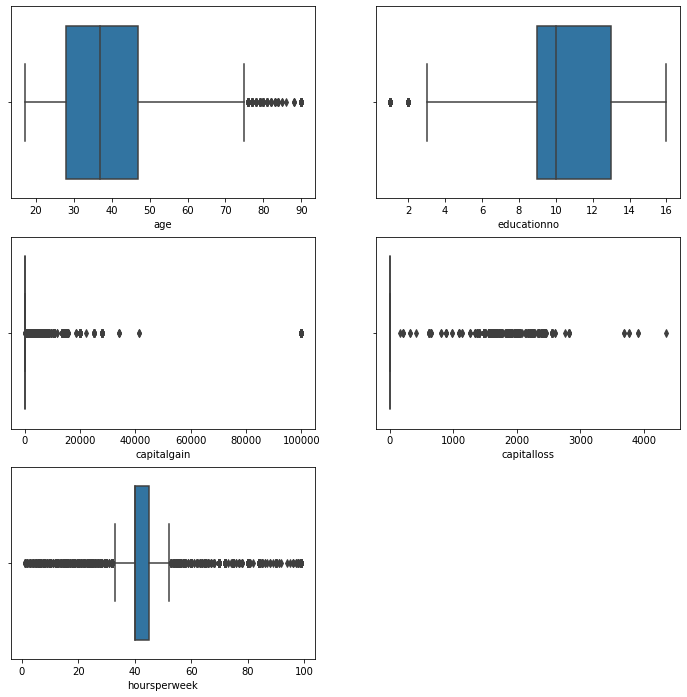

In [26]:
plt.figure(figsize=(12,12))
[plt.subplot(3,2,1), sns.boxplot(x=Train["age"])];

[plt.subplot(3,2,2), sns.boxplot(x=Train["educationno"])];

[plt.subplot(3,2,3), sns.boxplot(x=Train["capitalgain"])];

[plt.subplot(3,2,4), sns.boxplot(x=Train["capitalloss"])];

[plt.subplot(3,2,5), sns.boxplot(x=Train["hoursperweek"])];

In [27]:
# Convering values of "salary" column with use of "convert" function

convert = {' >50K': 1, ' <=50K': 2}
df1 = df1.replace({'Salary': convert})

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [29]:
for i in columns:
    df1[i]= label_encoder.fit_transform(df1[i])
    
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,37,2.0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,37,2.0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,37,2.0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,37,2.0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24727,25,2,16,10.0,4,7,1,1,0,0.0,0.0,34.0,37,2.0
24728,40,1,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,2.0
24730,51,2,16,10.0,2,5,0,4,1,0.0,0.0,50.0,37,2.0
24731,22,2,7,12.0,4,5,3,2,1,0.0,0.0,20.0,21,2.0


In [33]:
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [31]:
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [34]:
# importing test dataaset
Test=pd.read_csv("SalaryData_Test.csv")
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [35]:
Test.shape

(15060, 14)

In [36]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [37]:
Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [87]:
Test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [66]:
Test[Test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [88]:
# Correlation
# Checking Correlation between numerical function
correlationXx = Test.corr() # correlation without droping duplicated raws
correlationXx

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


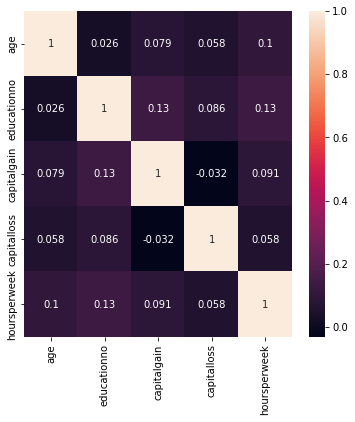

In [89]:
# creating heatmap by use of correlation
plt.figure(figsize=(6,6))
sns.heatmap(correlationXx,annot=True)

In [90]:
df2=Test.drop_duplicates()
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [91]:
Test['workclass'].unique(), Test['workclass'].value_counts()

(array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
        ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             11021
  Self-emp-not-inc     1297
  Local-gov            1033
  State-gov             667
  Self-emp-inc          572
  Federal-gov           463
  Without-pay             7
 Name: workclass, dtype: int64)

In [92]:
Test['education'].unique(), Test['education'].value_counts()

(array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
        ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
        ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
        ' Preschool'], dtype=object),  HS-grad         4943
  Some-college    3221
  Bachelors       2526
  Masters          887
  Assoc-voc        652
  11th             571
  Assoc-acdm       499
  10th             403
  7th-8th          266
  Prof-school      243
  9th              221
  12th             200
  Doctorate        169
  5th-6th          161
  1st-4th           71
  Preschool         27
 Name: education, dtype: int64)

In [93]:
Test['maritalstatus'].unique(), Test['maritalstatus'].value_counts()

(array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
        ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
       dtype=object),  Married-civ-spouse       6990
  Never-married            4872
  Divorced                 2083
  Separated                 472
  Widowed                   450
  Married-spouse-absent     182
  Married-AF-spouse          11
 Name: maritalstatus, dtype: int64)

In [94]:
Test['occupation'].unique(), Test['occupation'].value_counts()

(array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
        ' Other-service', ' Prof-specialty', ' Craft-repair',
        ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
        ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
        ' Armed-Forces'], dtype=object),  Exec-managerial      1992
  Craft-repair         1990
  Prof-specialty       1970
  Sales                1824
  Adm-clerical         1819
  Other-service        1596
  Machine-op-inspct    1004
  Transport-moving      744
  Handlers-cleaners     696
  Tech-support          508
  Farming-fishing       491
  Protective-serv       332
  Priv-house-serv        89
  Armed-Forces            5
 Name: occupation, dtype: int64)

In [95]:
Test['relationship'].unique(), Test['relationship'].value_counts()

(array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
        ' Other-relative'], dtype=object),  Husband           6203
  Not-in-family     3976
  Own-child         2160
  Unmarried         1576
  Wife               685
  Other-relative     460
 Name: relationship, dtype: int64)

In [96]:
Test['race'].unique(), Test['race'].value_counts()

(array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
        ' Asian-Pac-Islander'], dtype=object),  White                 12970
  Black                  1411
  Asian-Pac-Islander      408
  Amer-Indian-Eskimo      149
  Other                   122
 Name: race, dtype: int64)

In [97]:
Test['sex'].unique(), Test['sex'].value_counts()

(array([' Male', ' Female'], dtype=object),  Male      10147
  Female     4913
 Name: sex, dtype: int64)

In [98]:
Test['occupation'].unique(), Test['occupation'].value_counts()

(array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
        ' Other-service', ' Prof-specialty', ' Craft-repair',
        ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
        ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
        ' Armed-Forces'], dtype=object),  Exec-managerial      1992
  Craft-repair         1990
  Prof-specialty       1970
  Sales                1824
  Adm-clerical         1819
  Other-service        1596
  Machine-op-inspct    1004
  Transport-moving      744
  Handlers-cleaners     696
  Tech-support          508
  Farming-fishing       491
  Protective-serv       332
  Priv-house-serv        89
  Armed-Forces            5
 Name: occupation, dtype: int64)

In [99]:
Test['native'].unique(), Test['native'].value_counts()

(array([' United-States', ' Peru', ' Guatemala', ' Mexico',
        ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
        ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
        ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
        ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
        ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
        ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
        ' Hong', ' Greece', ' Trinadad&Tobago',
        ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object),
  United-States                 13788
  Mexico                          293
  Philippines                      95
  Puerto-Rico                      66
  Germany                          65
  Canada                           56
  El-Salvador                      47
  India                            47
  China                            45
  Cuba                             41
  England       

In [100]:
Test['Salary'].unique(), Test['Salary'].value_counts()

(array([' <=50K', ' >50K'], dtype=object),  <=50K    11360
  >50K      3700
 Name: Salary, dtype: int64)

In [101]:
for i in columns:
    df2[i]= label_encoder.fit_transform(df2[i])
    
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [102]:
# Convering values of "salary" column with use of "convert" function

convert = {' >50K': 1, ' <=50K': 2}
df2 = df2.replace({'Salary': convert})

In [103]:
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,2
1,38,2,11,9,2,4,0,4,1,0,0,50,37,2
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,2
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,2
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,2
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,2


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn.datasets import load_SalaryData_Test


In [105]:
x_train = df1.iloc[:,0:13]
y_train = df1.iloc[:,13]
x_test = df2.iloc[:,0:13]
y_test = df2.iloc[:,13]

In [129]:
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,37
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,37
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,37
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,37
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24726,33,5,16,10.0,0,0,4,4,0,0.0,0.0,45.0,37
24727,25,2,16,10.0,4,7,1,1,0,0.0,0.0,34.0,37
24728,40,1,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37
24730,51,2,16,10.0,2,5,0,4,1,0.0,0.0,50.0,37


In [130]:
x_train =x_train.dropna()

In [133]:
x_train.fillna(x_train.mean(), inplace=True)

In [137]:
from sklearn.naive_bayes import GaussianNB

In [135]:
y_train =y_train.dropna()

In [136]:
x_train.fillna(x_train.mean(), inplace=True)

In [141]:
# Model Making
clsfrgnb = GaussianNB()   
model1=clsfrgnb.fit(x_train, y_train)

In [142]:
# Prediction with x_test
y_pred_gnb = model1.predict(x_test)  # gnb=gausian naive bayes

In [143]:
y_pred_gnb

array([2., 2., 2., ..., 2., 1., 2.])

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gnb)   #Confusion matrix

array([[ 1190,  2320],
       [  557, 10063]])

In [122]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3510
2,10620


In [145]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten())*100)

Accuracy 79.63906581740977


In [146]:
#MULTIDIMENSIONAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
clsfrmnb = MultinomialNB()   
# clsfrgnb = claasification with Multinominal Naive Bayes

In [147]:
model2=clsfrmnb.fit(x_train, y_train)
model2

MultinomialNB()

In [148]:
y_pred_mnb = model2.predict(x_test)   
# mnb=Multinominal naive bayes

In [149]:
# Confusion Metrix
confusion_matrix(y_test, y_pred_mnb)

array([[  777,  2733],
       [  469, 10151]])

In [150]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3510
2,10620


In [151]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7733899504600141


In [152]:
from sklearn.metrics import accuracy_score

In [153]:
accuracy_score(y_test,y_pred_mnb) 

0.7733899504600141

In [154]:
#CROSS VALIDATION CHECK
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [155]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('MNB', MultinomialNB()))

In [156]:
results = []
names = []
scoring = 'accuracy'

In [157]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.796179 (0.005136)
KNN: 0.821903 (0.009929)
CART: 0.785219 (0.005895)
NB: 0.794524 (0.007382)
MNB: 0.768353 (0.006437)


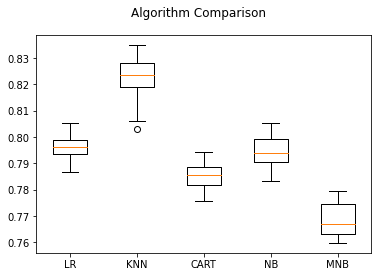

In [158]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [159]:
#Here I compare with different algorithms for checking which algorith gives us higher accuracy
#After comparing "KNN" gives higher accuracy, Accuracy of KNN = 0.824777